In [2]:
import numpy as np                                       # fast vectors and matrices
import matplotlib.pyplot as plt                          # plotting

from IPython.display import Audio

from intervaltree import Interval,IntervalTree

%matplotlib inline

In [3]:
fs = 44100      # samples/second

In [4]:
train_data = np.load('./numpy_version/musicnet.npz', encoding='bytes')

print ('Number of recordings: ' + str(len(train_data.files)))
print ('Example MusicNet ids: ' + str(list(train_data.keys())[0:5]))

Number of recordings: 330
Example MusicNet ids: ['1788', '1789', '2659', '2127', '1818']


In [5]:
X,Y = train_data['1788']

Text(0, 0.5, 'amplitude')

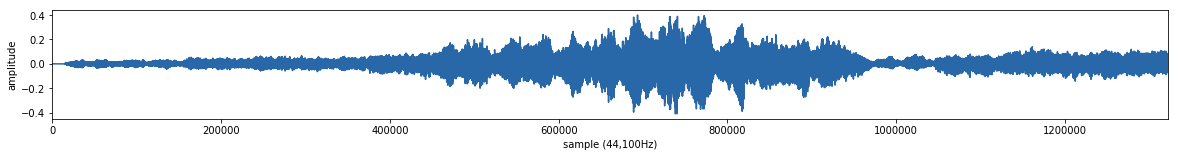

In [6]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(2)
plt.plot(X[0:30*fs],color=(41/255.,104/255.,168/255.))
fig.axes[0].set_xlim([0,30*fs])
fig.axes[0].set_xlabel('sample (44,100Hz)')
fig.axes[0].set_ylabel('amplitude')

In [8]:
Audio(X[0:10*fs],rate=fs)

In [9]:
print("Note present at sample " + str(fs*5) + '(5 seconds): ' + str(len(Y[fs*5])))
print("Note present at sample " + str(fs*4) + '(4 seconds): ' + str(len(Y[fs*4])))

Note present at sample 220500(5 seconds): 1
Note present at sample 176400(4 seconds): 1


In [10]:
sorted(Y[fs*5])[0] # make it a list

Interval(161758, 302558, (42, 56, 1, 0.6666666666666666, b'Half'))

In [11]:
(start, end, (instrument, note, measure, beat, note_value)) = sorted(Y[fs*5])[0]
print("-- An example of a MusicNet label --")
print("{:<36}".format("Start Time:") + str(start))
print("{:<36}".format("End Time:") + str(end))
print("{:<36}".format("Instrument (MIDI instrument code):") + str(instrument))
print("{:<36}".format("Note (MIDI note code):") + str(note))
print("{:<36}".format("Measure:") + str(measure))
print("{:<36}".format("Beat (0 <= beat < 1):" )+ str(beat))
print("{:<36}".format("Note Value:") + str(note_value))

-- An example of a MusicNet label --
Start Time:                         161758
End Time:                           302558
Instrument (MIDI instrument code):  42
Note (MIDI note code):              56
Measure:                            1
Beat (0 <= beat < 1):               0.6666666666666666
Note Value:                         b'Half'


# Visual Labels

In [12]:
stride = 512
wps = fs/float(stride)
Yvec = np.zeros((int(30*wps),128)) #30s long, 128 notes
colors={41:.33, 42:.66, 43:1}

for window in range(Yvec.shape[0]):
    labels = Y[window*stride]
    for label in labels:
        Yvec[window, label.data[1]] = colors[label.data[0]]

Text(0, 0.5, 'note (MIDI code)')

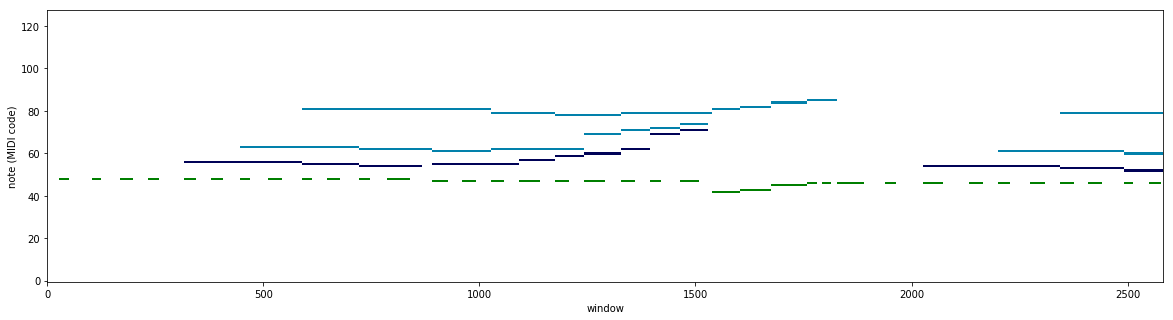

In [13]:
fig = plt.figure(figsize=(20,5))
plt.imshow(Yvec.T, aspect='auto', cmap="ocean_r")
plt.gca().invert_yaxis() # Because for image, the top left corner is 0,0
fig.axes[0].set_xlabel("window")
fig.axes[0].set_ylabel("note (MIDI code)")

# Audio Labels

In [184]:
mix_size=4096

labels = np.zeros(X.shape)
for (onset,offset,label) in sorted(Y):
    freq = 440.*2**((label[1] - 69.)/12.)
    mark = np.sin(freq*2.*np.pi*np.arange(0,mix_size)/float(fs))
    if onset + len(mark) < len(labels):
        labels[onset:onset+mix_size] += mark
        
labels /= np.max(labels)

mix = .8*labels + .2*X

Audio(mix[0:5*fs],rate=fs)

# Label study

In [170]:
stride = 512
wps = fs/float(stride)
Yvec = np.zeros((int(30*wps),128)) #30s long, 128 notes
colors={41:.33, 42:.66, 43:1}

for window in range(Yvec.shape[0]):
    labels = Y[window*stride]
    for label in labels:
        Yvec[window, label.data[1]] = colors[label.data[0]]

Text(0, 0.5, 'note (MIDI code)')

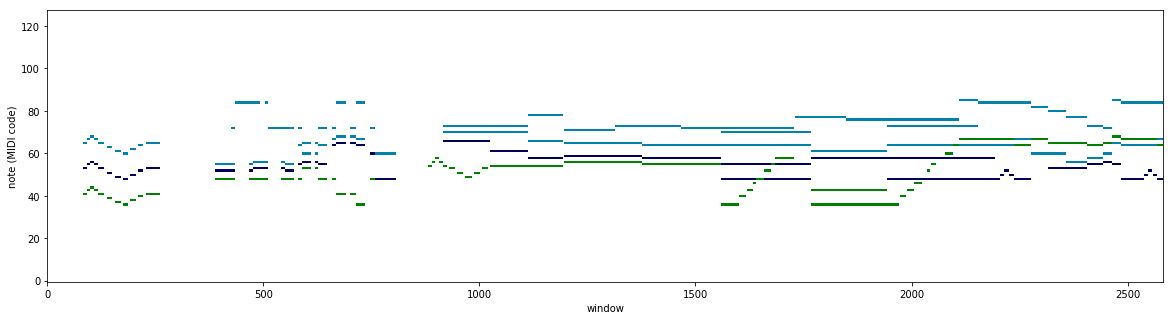

In [171]:
fig = plt.figure(figsize=(20,5))
plt.imshow(Yvec.T, aspect='auto', cmap="ocean_r")
plt.gca().invert_yaxis() # Because for image, the top left corner is 0,0
fig.axes[0].set_xlabel("window")
fig.axes[0].set_ylabel("note (MIDI code)")